In [103]:
import matplotlib.pyplot as plt
import pandas as pd
import os, numpy as np

In [116]:
fileNamesD = ["_GR-D-1","_GR-D-2","_GR-D-3","_GR-D-4"]
fileNamesS = ["_GR-S-1","_GR-S-2","_GR-S-3","_GR-S-4"]

chargeFolder = r"C:\Users\Mattia Colalongo\OneDrive - Novac SRL\Sharezone\Novac Condivisa\R&D materials\Cartelle_Personali\Mattia_Colalongo\LFP_Gr_ST\graphite_capacity\csv\charge"
dischargeFolder = r"C:\Users\Mattia Colalongo\OneDrive - Novac SRL\Sharezone\Novac Condivisa\R&D materials\Cartelle_Personali\Mattia_Colalongo\LFP_Gr_ST\graphite_capacity\csv\discharge"

step="step_2"
w_single = 6.70e-3 #g of average active in decoated(single) graphite
w_double = 14.15e-3 #g of average active in double graphite

[0. 0. 0. ... 0. 0. 0.] [0. 0. 0. ... 0. 0. 0.]


ValueError: operands could not be broadcast together with shapes (100000,) (62991,) 

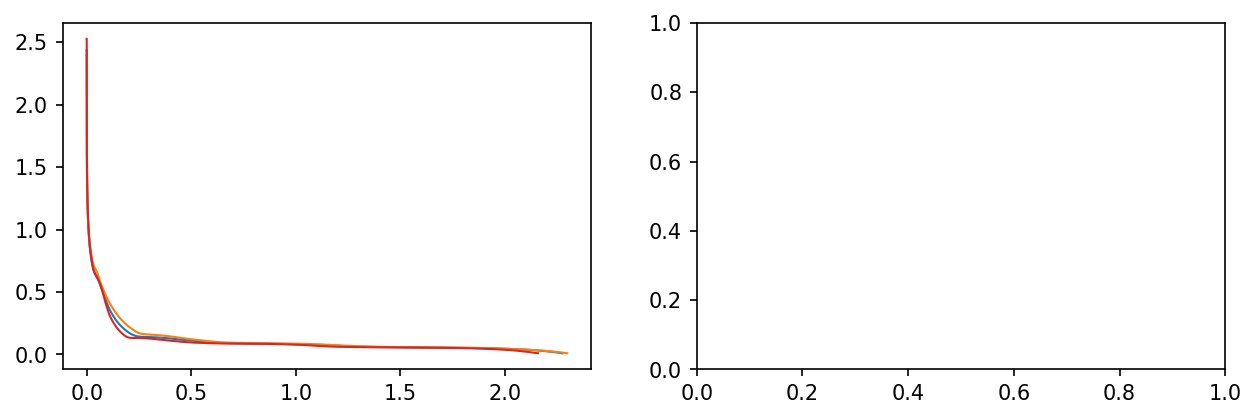

In [ ]:
fig, ax = plt.subplots(dpi=150, figsize=(10,3), ncols=2)
avg = []

for i in fileNamesS:
    for j in os.listdir(dischargeFolder):
        if (i in j) and (step in j):
            df = pd.read_csv(os.path.join(dischargeFolder,j))
            ax[0].plot(df['Capacity(Ah)']*1000, df['Voltage(V)'], label=j.split("_")[5], lw=1)
            avg.append([df['Capacity(Ah)']*1000,df['Voltage(V)']])

# length =  len(avg[0][0])
size = len(avg)
voltage = np.zeros(100000)
capacity = np.zeros(100000)
print(voltage,capacity)
for i in avg:
    voltage = np.add(voltage,i[1])
    capacity = np.add(capacity,i[0])

ax[1].plot(capacity/size, voltage/size, label="avg", lw=1, color='red')


plt.suptitle(f"Graphite_SingleLayer_{step}")

for i in ax.ravel():
    i.set_ylim(-0.1, 1.5)
    i.set_xlabel("Capacity(mAh)")
    i.set_ylabel("Voltage(V)")
    i.grid(":", lw=0.3)
    i.legend(frameon=False)

plt.show()

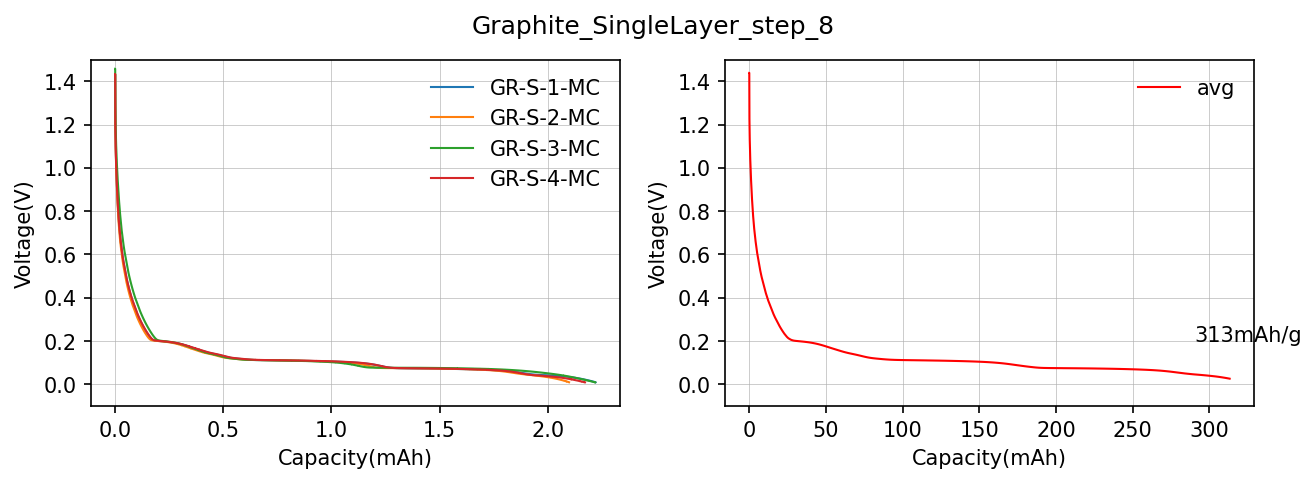

In [115]:
fig, ax = plt.subplots(dpi=150, figsize=(10,3), ncols=2)
avg = []

for i in fileNamesS:
    for j in os.listdir(dischargeFolder):
        if (i in j) and (step in j):
            df = pd.read_csv(os.path.join(dischargeFolder,j))
            ax[0].plot(df['Capacity(Ah)']*1000, df['Voltage(V)'], label=j.split("_")[5], lw=1)
            avg.append([df['Capacity(Ah)']*1000,df['Voltage(V)']])

length =  len(avg[0][0])
size = len(avg)
voltage = np.zeros(length)
capacity = np.zeros(length)
for i in avg:
    voltage = voltage + i[1]
    capacity = capacity + i[0]

ax[1].plot(capacity/size/w_single, voltage/size, label="avg", lw=1, color='red')
ax[1].text(x=290, y=0.2, s="{:.0f}mAh/g".format(capacity.dropna().iloc[-1]/size/w_single))

plt.suptitle(f"Graphite_SingleLayer_{step}")

for i in ax.ravel():
    i.set_ylim(-0.1, 1.5)
    i.set_xlabel("Capacity(mAh)")
    i.set_ylabel("Voltage(V)")
    i.grid(":", lw=0.3)
    i.legend(frameon=False)

plt.show()

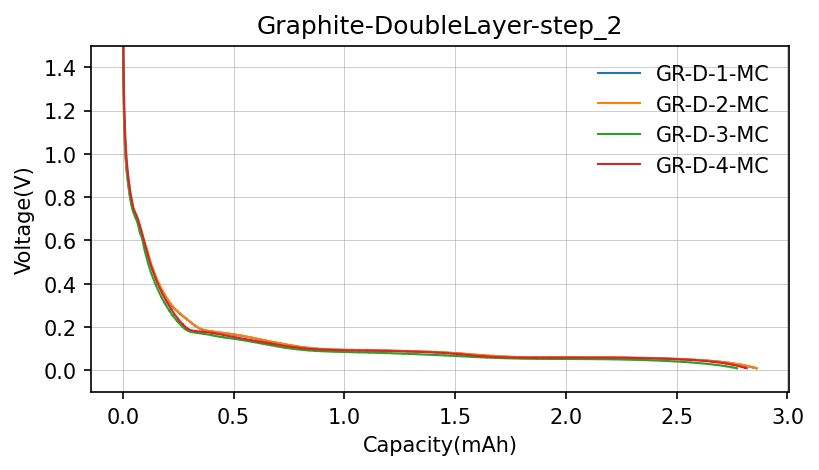

In [107]:
fig, ax = plt.subplots(dpi=150, figsize=(6,3))
for i in fileNamesD:
    for j in os.listdir(dischargeFolder):
        if (i in j) and (step in j):
            df = pd.read_csv(os.path.join(dischargeFolder,j))
            ax.plot(df['Capacity(Ah)']*1000, df['Voltage(V)'], label=j.split("_")[5], lw=1)



ax.set_title(f"Graphite-DoubleLayer-{step}")
ax.set_ylim(-0.1, 1.5)
ax.set_xlabel("Capacity(mAh)")
ax.set_ylabel("Voltage(V)")
ax.grid(":", lw=0.3)
ax.legend(frameon=False)
plt.show()